# General NBA Study

In [2]:
# Dependencies and Setup
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib.colors as mcolors

In [3]:
# Pull NBA draft CSV
draft_path = Path("Resources/cleaned_draft_data.csv")
draft_data = pd.read_csv(draft_path)
draft_data.head()

,_id,Name,Month,Day,Year,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birth City,Birth State/Country
0,abdelal01,Alaa Abdelnaby,June,24,1968,Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,Cairo,Egypt
1,abdulma02,Mahmoud Abdul-Rauf,March,9,1969,Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,Gulfport,Mississippi
2,abdulta01,Tariq Abdul-Wahad,November,3,1974,Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,Maisons Alfort,France
3,abdursh01,Shareef Abdur-Rahim,December,11,1976,Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,Marietta,Georgia
4,abrinal01,Alex Abrines,August,1,1993,Shooting Guard,No college,2013,2nd round,32nd overall,174,5.3,922,Palma de Mallorca,Spain


In [4]:
# Pull NBA salary CSV
salaries_path = Path("Resources/cleaned_salary_data.csv")
salaries = pd.read_csv(salaries_path)
salaries.head()

,_id,Total Earnings,Inflation-Adjusted Earnings
0,abdelal01,2844000,6.304225e+06
1,abdulka01,8560000,2.406022e+07
2,abdulma02,19849500,4.177226e+07
3,abdulta01,37982800,6.558494e+07
4,abdursh01,95866000,1.630366e+08


In [5]:
# Merge data
full_data = pd.merge(draft_data, salaries, on="_id")
full_data.head()

,_id,Name,Month,Day,Year,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birth City,Birth State/Country,Total Earnings,Inflation-Adjusted Earnings
0,abdelal01,Alaa Abdelnaby,June,24,1968,Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,Cairo,Egypt,2844000,6.304225e+06
1,abdulma02,Mahmoud Abdul-Rauf,March,9,1969,Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,Gulfport,Mississippi,19849500,4.177226e+07
2,abdulta01,Tariq Abdul-Wahad,November,3,1974,Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,Maisons Alfort,France,37982800,6.558494e+07
3,abdursh01,Shareef Abdur-Rahim,December,11,1976,Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,Marietta,Georgia,95866000,1.630366e+08
4,abrinal01,Alex Abrines,August,1,1993,Shooting Guard,No college,2013,2nd round,32nd overall,174,5.3,922,Palma de Mallorca,Spain,11719764,1.504430e+07


In [6]:
# Print total number of rows
full_data.count()

_id                            1535
Name                           1535
Month                          1535
Day                            1535
Year                           1535
Position                       1535
College                        1535
Draft Year                     1535
Draft Round                    1535
Draft Pick                     1535
Career Games Played            1535
Career Points Per Game         1535
Total Career Points            1535
Birth City                     1535
Birth State/Country            1532
Total Earnings                 1535
Inflation-Adjusted Earnings    1535
dtype: int64

## Distribution of Total Earnings
To check how player earnings are distributed

In [7]:
# Create a helper function to convert "−" into "-" to avoid float-conversion issue
def convert(num):
    if num[0] == "−":
        result = num.replace("−", "-")
    else:
        result = num
    return result

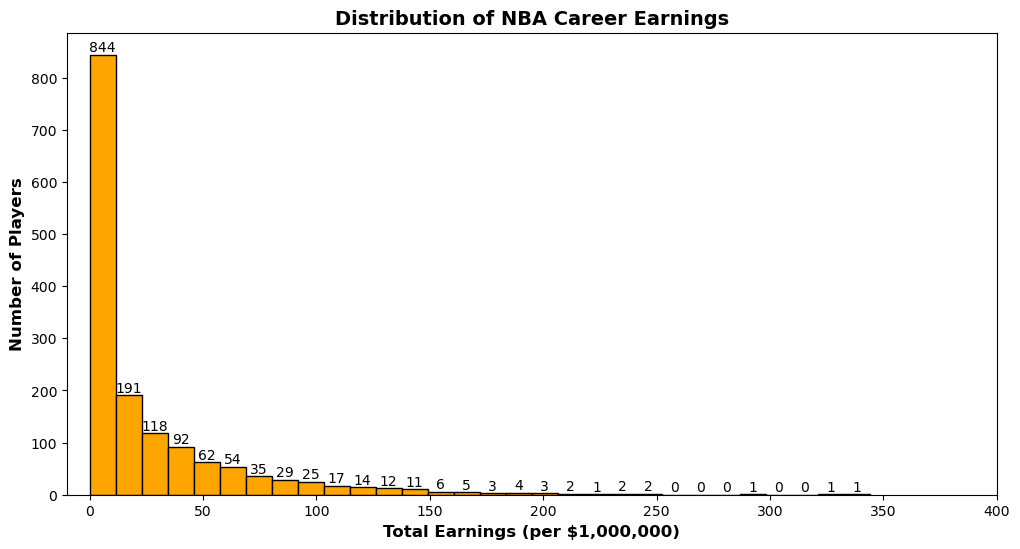

In [8]:
# 1. Distribution of NBA Career Earnings
plt.figure(figsize=(12, 6))
counts, edges, bars = plt.hist(full_data['Total Earnings'], bins=30, edgecolor='black', color='orange')
plt.bar_label(bars)
plt.title('Distribution of NBA Career Earnings', size=14, weight='bold')
plt.xlabel('Total Earnings (per $1,000,000)', size=12, weight='bold')
xlocs, xlabels = plt.xticks()
xlabels = [int(float(convert(label.get_text())) * 100) for label in xlabels]
plt.xticks(xlocs, labels=xlabels)
plt.xlim(-10000000, 400000000)
plt.ylabel('Number of Players', size=12, weight='bold')
plt.savefig("Resources/general_earnings.png")
plt.show()

In [9]:
# Find the mean, median, variance, std. deviation and SEM of total player earnings and inflation-adjusted earnings
describe_df = full_data[["Total Earnings", "Inflation-Adjusted Earnings"]].describe()
earnings_vars = full_data[["Total Earnings", "Inflation-Adjusted Earnings"]].var().squeeze()
earnings_sems = full_data[["Total Earnings", "Inflation-Adjusted Earnings"]].sem().squeeze()

describe_df.loc["mean"] = "$" + describe_df.loc["mean"].map("{:,.2f}".format)
describe_df.loc["50%"] = "$" + describe_df.loc["50%"].map("{:,.2f}".format)
describe_df.loc["std"] = "$" + describe_df.loc["std"].map("{:,.2f}".format)
earnings_vars = "$" + earnings_vars.map("{:,.2f}".format)
earnings_sems = "$" + earnings_sems.map("{:,.2f}".format)
                                       
summary_df = pd.DataFrame({
        "Mean Earnings": describe_df.loc["mean"],
        "Median Earnings": describe_df.loc["50%"],
        "Earnings Variance": earnings_vars,
        "Earnings Std. Dev.": describe_df.loc["std"],
        "Earnings Std. Err": earnings_sems
})

summary_df

,Mean Earnings,Median Earnings,Earnings Variance,Earnings Std. Dev.,Earnings Std. Err
Total Earnings,"$25,956,010.50","$8,025,506.00","$1,599,699,291,336,443.00","$39,996,240.97","$1,020,857.18"
Inflation-Adjusted Earnings,"$39,960,400.93","$12,583,081.94","$3,710,286,011,152,364.50","$60,912,117.11","$1,554,710.40"


In [10]:
# Find outliers in total player earnings
total_player_earnings = full_data[["_id", "Name", "Total Earnings"]]
quartiles = total_player_earnings["Total Earnings"].quantile([.25, .5, .75])
upperq = quartiles[0.75]
lowerq = quartiles[0.25]
iqr = upperq - lowerq
upper_bound = upperq + iqr*1.5,
lower_bound = lowerq - iqr*1.5
print(f"Potential outliers: \n{total_player_earnings.loc[(total_player_earnings['Total Earnings'] > upper_bound) | (total_player_earnings['Total Earnings'] < lower_bound)]['Name']}")

Potential outliers: 
3       Shareef Abdur-Rahim
19        LaMarcus Aldridge
28                Ray Allen
51          Carmelo Anthony
56           Gilbert Arenas
               ...         
1438           Chris Webber
1446             David West
1449      Russell Westbrook
1469         Deron Williams
1484        Marvin Williams
Name: Name, Length: 131, dtype: object


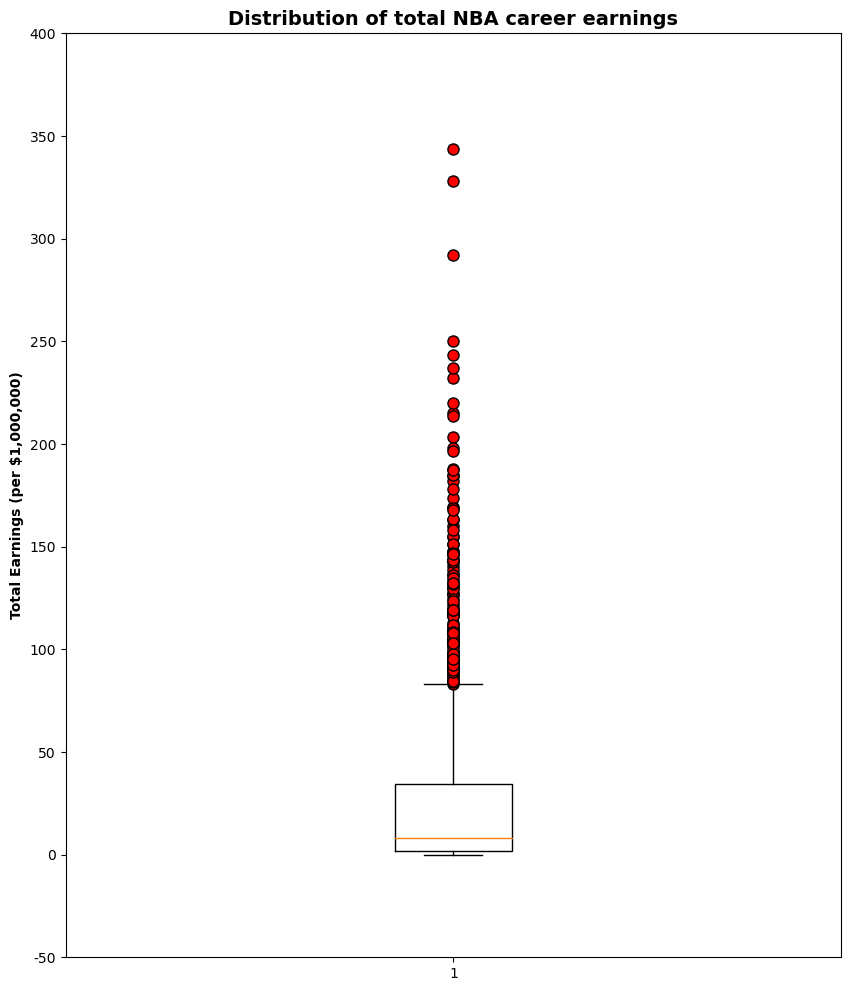

In [11]:
# 2. Generate a box plot that shows the distribution of total NBA career earnings
fig, ax = plt.subplots(figsize=(10, 12))

data = total_player_earnings["Total Earnings"]
ax.boxplot(data, flierprops = dict(marker = "o", markerfacecolor = "red", markersize=8))
plt.title("Distribution of total NBA career earnings", size=14, weight="bold")
plt.ylabel("Total Earnings (per $1,000,000)", weight="bold")

ylocs, ylabels = plt.yticks()
ylabels = [int(float(convert(label.get_text())) * 100) for label in ylabels]
plt.yticks(ylocs, labels=ylabels)
plt.savefig("Resources/general_earnings_outliers.png")
plt.show()